# Assignment 1

Mathia Quimpo, Matthew Chin, Wanqiu Zhang

## Exploration and Preprocessing

In [4]:
import pandas as pd
import numpy as np
import re
import os
import string
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt

In [5]:
# Download necessary resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# Load dataset
df = pd.read_csv(r"C:\Users\matth\Desktop\MSBA\BSAN 6200\Reviews.csv")

print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [7]:
# Display column names
print("Columns in the dataset:\n", df.columns)

Columns in the dataset:
 Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [8]:
# Get general info
print(df.info())

# Descriptive statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None
                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817               

In [9]:
# Add a new column for text length
df["Text_Length"] = df["Text"].astype(str).apply(len)

# Display descriptive statistics for text length
print(df["Text_Length"].describe())

count    568454.000000
mean        436.222083
std         445.339741
min          12.000000
25%         179.000000
50%         302.000000
75%         527.000000
max       21409.000000
Name: Text_Length, dtype: float64


In [10]:
# Read a few random review samples
print(df["Text"].sample(10, random_state=45))

300665    I have used this product before and found it t...
167485    The product arrived a bit later than expected ...
313460    I never eat this stuff, usually but Walmart ha...
7589      It's all natural, no artificial color, no weir...
48968     I've not actually used any other filter paper ...
146982    I ordered pack of 4. I've been expected good c...
538997    I try to avoid artificial sweeteners, but I lo...
296558    Timothy's World is your "average, but nothing ...
81877     Imagine doggie treat flavored underarm deodora...
413831    For WW, this is great. Don't get me wrong, I s...
Name: Text, dtype: object


In [11]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [12]:
# Text cleaning function
def clean_text(text):
    if not isinstance(text, str):
        return ""  # Handle missing values
    
    # 1. Remove HTML tags using a regex pattern
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags

    # 2. Replace URLs with a placeholder "URL"
    text = re.sub(r'http[s]?://\S+', 'URL', text)

    # 3. Convert to lowercase
    text = text.lower()

    # 4. Remove special characters, numbers, and punctuation
    text = re.sub(r"[^a-z\s]", "", text)

    # 5. Tokenize the text into words
    words = word_tokenize(text)

    # 6. Remove stopwords and lemmatize
    cleaned_text = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # 7. Replace multiple spaces with a single space
    cleaned_text = " ".join(cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

In [13]:
# Select 100 random rows
random_sample = df.sample(100)

In [14]:
# Apply the updated cleaning function to the Text column
random_sample["Cleaned_Text"] = random_sample["Text"].apply(clean_text)

In [15]:
# Spot-checking
spotcheck_sample = random_sample[["Text", "Cleaned_Text"]].sample(5, random_state=45)
print(spotcheck_sample)

                                                     Text  \
377624  This is my least favorite of the varieties - s...   
384167  Let's face it, most GF bread is disgusting!  W...   
494985  So glad I read the reviews and ordered this ma...   
201632  The storage drawer is a great idea and  would ...   
1141    One of my kitties is a complete snob when it c...   

                                             Cleaned_Text  
377624  least favorite variety seems aftertaste yet te...  
384167  let face gf bread disgusting want eat somethin...  
494985  glad read review ordered maple syrup good pric...  
201632  storage drawer great idea would useful except ...  
1141    one kitty complete snob come food love great p...  


## VADER

In [17]:
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

In [18]:
# Tokenize the Cleaned_Text once and store it in a new column 'Tokens'
random_sample['Tokens'] = random_sample['Cleaned_Text'].apply(word_tokenize)

In [19]:
# Apply Feature Engineering on the pre-tokenized text
def extract_features_from_tokens(tokens):
    word_count = len(tokens)
    unique_word_count = len(set(tokens))
    avg_word_length = sum(len(word) for word in tokens) / word_count if word_count else 0

    # Sentiment analysis with VADER
    sentiment = analyzer.polarity_scores(" ".join(tokens))  # VADER expects a string, not tokens

    return [word_count, unique_word_count, avg_word_length, sentiment['compound']]

# Now apply the feature extraction on the 'Tokens' column (pre-tokenized)
random_sample[['Word_Count', 'Unique_Word_Count', 'Avg_Word_Length', 'Sentiment_Score']] = random_sample['Tokens'].apply(
    lambda x: pd.Series(extract_features_from_tokens(x)))

# Spot-check the results
print(random_sample[['Text', 'Cleaned_Text', 'Tokens', 'Word_Count', 'Unique_Word_Count', 'Avg_Word_Length', 'Sentiment_Score']].head())


                                                     Text  \
377624  This is my least favorite of the varieties - s...   
384167  Let's face it, most GF bread is disgusting!  W...   
178792  The family which received this gift basket fro...   
90952   Great Coffee! Item was shipped quickly and as ...   
149660  I love this! I used to take creamer in my iced...   

                                             Cleaned_Text  \
377624  least favorite variety seems aftertaste yet te...   
384167  let face gf bread disgusting want eat somethin...   
178792  family received gift basket told many great it...   
90952   great coffee item shipped quickly presented de...   
149660  love used take creamer iced coffee beginning y...   

                                                   Tokens  Word_Count  \
377624  [least, favorite, variety, seems, aftertaste, ...        15.0   
384167  [let, face, gf, bread, disgusting, want, eat, ...        32.0   
178792  [family, received, gift, basket, told, 

In [20]:
def classify_sentiment(sentiment_score):
    if sentiment_score > 0.1:
        return "Positive"
    elif sentiment_score < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment classification based on VADER sentiment score
random_sample['Sentiment_Label'] = random_sample['Sentiment_Score'].apply(classify_sentiment)

# Show some of the classified sentiments
print(random_sample[['Cleaned_Text', 'Sentiment_Score', 'Sentiment_Label']].head())

                                             Cleaned_Text  Sentiment_Score  \
377624  least favorite variety seems aftertaste yet te...          -0.7167   
384167  let face gf bread disgusting want eat somethin...          -0.6486   
178792  family received gift basket told many great it...           0.9882   
90952   great coffee item shipped quickly presented de...           0.7845   
149660  love used take creamer iced coffee beginning y...           0.9552   

       Sentiment_Label  
377624        Negative  
384167        Negative  
178792        Positive  
90952         Positive  
149660        Positive  


In [21]:
# Extract sentiment predictions from VADER
random_sample['VADER_Sentiment'] = random_sample['Sentiment_Score'].apply(
    lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral'
)

In [22]:
# Spot-check several examples
spotcheck_sample = random_sample[['Text', 'VADER_Sentiment']].sample(5, random_state=45)

print(spotcheck_sample)

                                                     Text VADER_Sentiment
377624  This is my least favorite of the varieties - s...        Negative
384167  Let's face it, most GF bread is disgusting!  W...        Negative
494985  So glad I read the reviews and ordered this ma...        Positive
201632  The storage drawer is a great idea and  would ...        Positive
1141    One of my kitties is a complete snob when it c...        Positive


In [23]:
# To manually review the sentiment, you can check the first few examples
for idx, row in spotcheck_sample.iterrows():
    print(f"Review Text: {row['Text']}")
    print(f"VADER Sentiment: {row['VADER_Sentiment']}")
    print("-" * 50)

Review Text: This is my least favorite of the varieties - seems to have an aftertaste yet is only tea. All in all not bad - I would order again - when the price goes back to a more reasonable level!
VADER Sentiment: Negative
--------------------------------------------------
Review Text: Let's face it, most GF bread is disgusting!  Who wants to eat something you have to nuke or toast to eat it and it still is awful?  Not this bread.  Very easy to make (although my rising time is a lot longer than 40 minutes).  I cut the bread thin to make sandwiches.  The only drawback is the bread is crumbly.  The taste more than makes up for this.
VADER Sentiment: Negative
--------------------------------------------------
Review Text: So glad I read the reviews and ordered this maple syrup.  It is very good and the price is right too!  A winner you should take a chance on.
VADER Sentiment: Positive
--------------------------------------------------
Review Text: The storage drawer is a great idea and

## TextBlob

In [25]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity, 'Positive' if blob.sentiment.polarity > 0 else ('Negative' if blob.sentiment.polarity < 0 else 'Neutral')

# Apply the function and append new columns
random_sample[['TextBlob_Polarity', 'TextBlob_Subjectivity', 'TextBlob_Sentiment']] = random_sample['Cleaned_Text'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Display the updated DataFrame
random_sample

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,Tokens,Word_Count,Unique_Word_Count,Avg_Word_Length,Sentiment_Score,Sentiment_Label,VADER_Sentiment,TextBlob_Polarity,TextBlob_Subjectivity,TextBlob_Sentiment
377624,377625,B001KWZKO8,A2K6Q5PV6G70A0,saddleseat,1,1,3,1257033600,Green tea -!!,This is my least favorite of the varieties - s...,...,"[least, favorite, variety, seems, aftertaste, ...",15.0,15.0,5.333333,-0.7167,Negative,Negative,-0.060000,0.533333,Negative
384167,384168,B000EVWQZW,A3IO0SBXXJIWG9,Dharma,0,0,5,1323216000,The best GF bread I have had yet!,"Let's face it, most GF bread is disgusting! W...",...,"[let, face, gf, bread, disgusting, want, eat, ...",32.0,26.0,5.031250,-0.6486,Negative,Negative,-0.491667,0.920833,Negative
178792,178793,B0001WAMA0,A34ANNWI196H4L,Krista A. S. - Arizona,0,0,5,1347148800,Probably Will Be Enjoyed by the Family Who Rec...,The family which received this gift basket fro...,...,"[family, received, gift, basket, told, many, g...",44.0,35.0,5.590909,0.9882,Positive,Positive,0.514286,0.689286,Positive
90952,90953,B0079Y8KUC,A10JDFMH3PQ28U,Shopper Girl,0,2,5,1337731200,Gevalia Great Coffee,Great Coffee! Item was shipped quickly and as ...,...,"[great, coffee, item, shipped, quickly, presen...",21.0,20.0,6.095238,0.7845,Positive,Positive,0.461111,0.583333,Positive
149660,149661,B000E8WIAS,A1IK2DP6SH9QPD,Mommy of 2,0,0,5,1337212800,Yummy,I love this! I used to take creamer in my iced...,...,"[love, used, take, creamer, iced, coffee, begi...",30.0,24.0,5.133333,0.9552,Positive,Positive,0.225000,0.554167,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499616,499617,B000CQID6U,A1TJXXU8HQ3YU4,GreatGrandmemas,1,1,5,1344643200,"As good as Bentley's, MUCH cheaper at Amazon.com.",I never liked Earl Grey til I had Bentley's. ...,...,"[never, liked, earl, grey, til, bentleys, gift...",44.0,41.0,5.659091,0.7202,Positive,Positive,-0.034249,0.487179,Negative
319658,319659,B000FNEX8C,AC4A11M7LCYZD,Tierra,3,3,5,1169251200,Yummy and healthy!,These are the only cookies I have found that I...,...,"[cooky, found, safely, eat, without, feeling, ...",58.0,49.0,5.068966,0.7490,Positive,Positive,0.300000,0.507143,Positive
272388,272389,B000JWCA02,A31J176KH7ZZEY,Lalita Tawjareon,0,2,5,1301011200,Nice Caramels,I ordered these triple treat caramels as part ...,...,"[ordered, triple, treat, caramel, part, upcomi...",274.0,157.0,5.839416,0.9992,Positive,Positive,0.370675,0.540163,Positive
266392,266393,B003QKBDX4,A3VJRET2XN8IRF,"Susan D. Rosko ""mrs. spunkmeister""",1,2,4,1287187200,Via instant coffee,"As a convenience, this is great coffee. I do ...",...,"[convenience, great, coffee, find, however, hi...",28.0,27.0,6.750000,0.9284,Positive,Positive,0.553333,0.630000,Positive


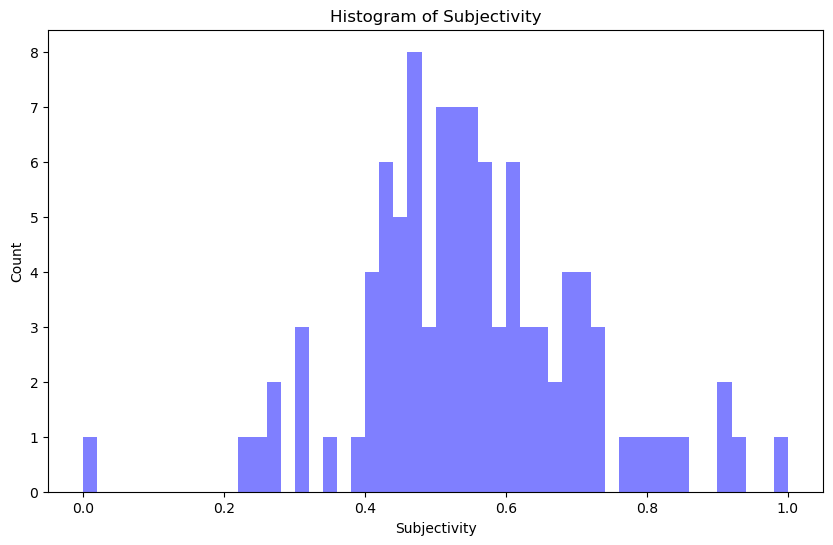

In [26]:
#Draw a histogram that shows the distribution of subjectivity: Count vs. subjectivity
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(random_sample.TextBlob_Subjectivity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity')
plt.show()

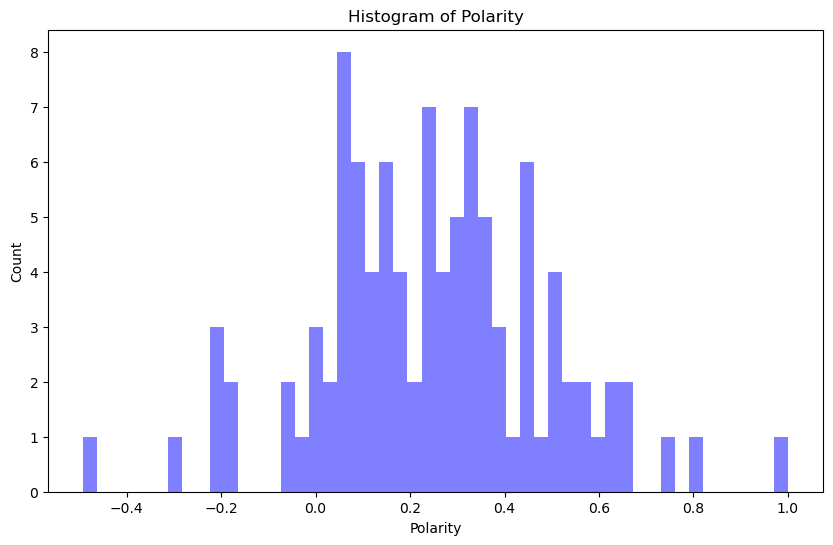

In [27]:
#Draw a histogram that shows the distribution of polarity: Count vs. polarity
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(random_sample.TextBlob_Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity')
plt.show()